<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.4
# *PCA Lab*

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LABRARIES
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
breast_cancer_csv = '../../DATA/breast-cancer-wisconsin-data.csv'
df = pd.read_csv(breast_cancer_csv)

### 2. EDA

Explore dataset. Clean data. Find correlation.

In [3]:
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [4]:
df = df.drop('Unnamed: 32',axis=1)
df = df.drop('id',axis=1)

In [5]:
df.shape

(569, 31)

In [6]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [8]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
mapping = {'M': 1, 'B': 0}

df['diagnosis_encoded'] = df['diagnosis'].replace(mapping)

df.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
414,M,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.027390,0.1852,...,36.91,110.10,931.4,0.11480,0.09866,0.15470,0.06575,0.3233,0.06165,1
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,1
50,B,11.76,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.011150,0.1495,...,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563,0
48,B,12.05,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,0.1675,...,20.70,89.88,582.6,0.14940,0.21560,0.30500,0.06548,0.2747,0.08301,0
237,M,20.48,21.46,132.50,1306.0,0.08355,0.08348,0.09042,0.060220,0.1467,...,26.17,161.70,1750.0,0.12280,0.23110,0.31580,0.14450,0.2238,0.07127,1
346,B,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,0.1555,...,27.06,86.54,562.6,0.12890,0.13520,0.04506,0.05093,0.2880,0.08083,0
432,M,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.125900,0.1724,...,25.07,146.00,1479.0,0.16650,0.29420,0.53080,0.21730,0.3032,0.08075,1
287,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.011710,0.1337,...,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915,0
492,M,18.01,20.56,118.40,1007.0,0.10010,0.12890,0.11700,0.077620,0.2116,...,26.06,143.40,1426.0,0.13090,0.23270,0.25440,0.14890,0.3251,0.07625,1
429,B,12.72,17.67,80.98,501.3,0.07896,0.04522,0.01402,0.018350,0.1459,...,20.96,88.87,586.8,0.10680,0.09605,0.03469,0.03612,0.2165,0.06025,0


In [10]:
df = df.drop(['diagnosis'], axis=1)

df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### 3. Subset & Normalize

Subset the data to only include all columns except diagnosis.

In [11]:
# ANSWER
from sklearn.preprocessing import StandardScaler
import seaborn as sns

scaler = StandardScaler()

X = df.drop(['diagnosis_encoded'], axis=1)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = df['diagnosis_encoded']

X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

In [12]:
# ANSWER
corr = X.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


### 4. Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [13]:
# ANSWER
eigenvalues, eigenvectors = np.linalg.eig(corr)

### 5. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues.

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [37]:
def calculate_cum_var_exp(eig_vals):
    '''
    Calculate Explained Variance from Eigenvalues

    Return a list or array containing the cumulative explained variance
    '''

    # Sort the eigenvalues in descending order
    sorted_eig_vals = sorted(eig_vals, reverse=True)
    
    # Calculate the total sum of the eigenvalues
    total = sum(sorted_eig_vals)
    
    # Compute the explained variance for each eigenvalue
    var_exp = [(i / total) for i in sorted_eig_vals]
    
    # Calculate the cumulative sum of the explained variance ratios
    cum_var_exp = np.cumsum(var_exp)

    return cum_var_exp

In [15]:
def plot_var_exp(eig_vals):

    cum_var_exp = calculate_cum_var_exp(eig_vals)

    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('cumulative variance explained', fontsize=16)
    ax.set_xlabel('component', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(12)

    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(12)

    ax.set_title('component vs cumulative variance explained\n', fontsize=20)

    plt.show()

### 6. Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
- Fit X
- Plot the explained variance
- Define n_components
    - n_component
- Apply dimensionality reduction to X
    - transform
- Create PairPlot of PCA

In [16]:
# ANSWER
from sklearn.decomposition import PCA

# Create an instance of PCA
pca = PCA(n_components=2)

# Fit Xs
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [17]:
principalDf

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


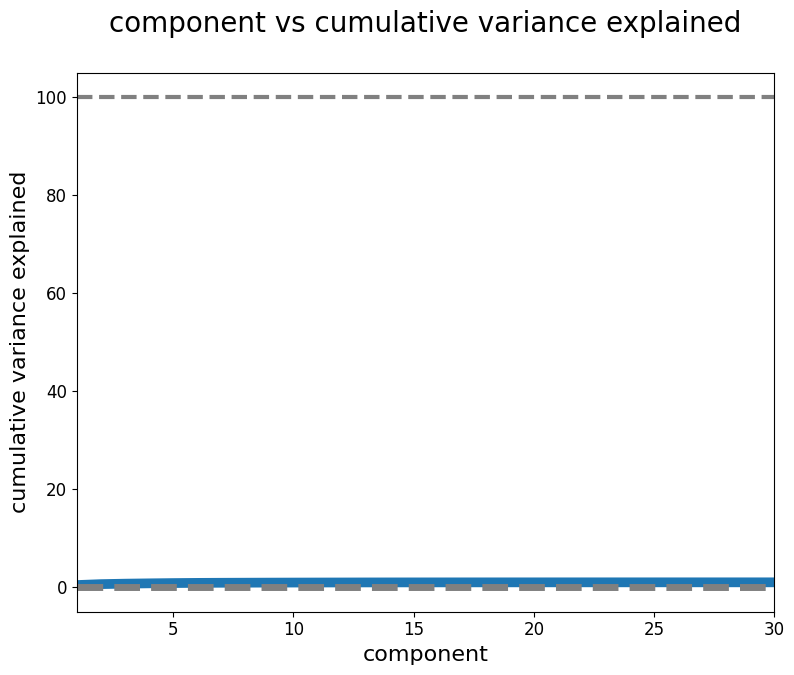

In [38]:
# ANSWER
# Plot explained_variance_
plot_var_exp(eigenvalues)

In [24]:
# ANSWER
# Apply dimensionality reduction to Xs using transform
from sklearn import decomposition

pca2 = decomposition.PCA().fit(principalDf)

x_transformed  =  pd.DataFrame(pca2.transform(principalDf), columns = np.arange(1, principalDf.shape[1]+1))
x_transformed.head()


,1,2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


c:\Users\Louis\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


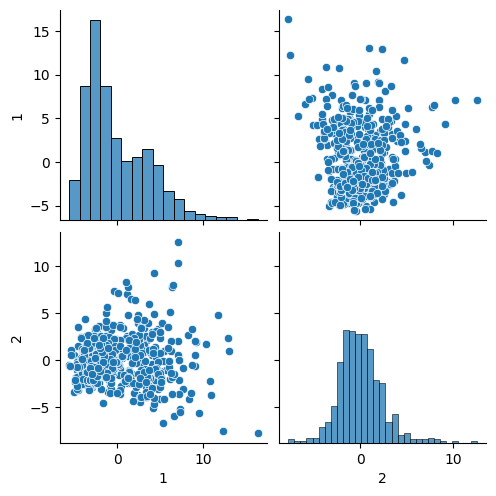

In [25]:
# ANSWER
# Create PairPlot of PCA
sns.pairplot(x_transformed)


### 7. Split Data to 80/20 and use PCA you got in step 6 as X

Split data 80/20 and Use KNN to find score.

In [26]:
# ANSWER
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split Data
X_train, X_test, y_train, y_test= train_test_split(x_transformed, y, test_size= 0.2, random_state=0) 


In [29]:
# ANSWER
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  

classifier= KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)


cm= confusion_matrix(y_test, y_pred)  
print(cm)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy = ', accuracy)



[[63  4]
 [ 4 43]]
Accuracy =  0.9298245614035088


Feedback on this one would be much appreciated! I have no idea if I wrote the 'calculate_cum_var_exp' function correctly. I don't know what I'm supposed to learn from that 'component vs cumulative variance explained' graph?

I'm also unsure whether I applied the dimensionality reduction correctly - I wasn't sure whether I was supposed to use the original 30ish columns I had in X, or if I was supposed to use the 2 columns I got from the PCA transformation??

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



